<h2 style="color: #e67300;
           background-color: #FFFDD0; /* cream color */  
           font-family: 'Trebuchet MS', sans-serif; 
           font-weight: bold; 
           text-align: left; 
           padding: 15px;
           border-radius: 10px;
           font-size: 36px;
           margin-top: 50px;">
Customer Sentiment Analysis - E-commerce Sector
</h2>

<div style="border-radius:10px; padding: 15px; background-color: #FFFDD0; font-size:130%; text-align:left">
<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>About Company:</font></h2>
    
This extensive dataset, comprised of over 250,000 customer reviews, offers a detailed exploration of customer experiences on TeePublic, an online platform renowned for its diverse collection of fashion items. The dataset spans crucial information, including reviewer_id, store_location, latitude, longitude, date, month, year, title, review, and the review-label indicating a rating on a scale of 1 to 5.
    
**Key Features:**
    
-**reviewer_id**: A unique identifier for each reviewer, ensuring anonymity and privacy.
    
-**store_location**: Geographic information specifying the location of the TeePublic fashion store.
    
-**latitude**: The latitude coordinate of the store's location, providing precise geospatial data.
    
-**longitude**: The longitude coordinate of the store's location, offering detailed geographic insights.
    
-**date**: The specific date when the review was posted, enabling temporal analysis.
    
-**month**: The month in which the review was posted, facilitating monthly trends exploration.
    
-**year**: The year of the review, allowing for yearly analysis and trend identification.
    
-**title**: The title associated with each review, capturing succinct sentiments or key points.
    
-**review**: The textual content of the review, presenting detailed feedback from customers.
    
-**review-label**: The reviewer's rating on a scale from 1 to 5, providing a quantitative measure of satisfaction.
    
###**TeePublic and Fashion Store Context:**
    
TeePublic is a prominent online platform celebrated for its extensive collection of fashion items, including apparel, accessories, and more. This dataset, comprising reviews from the fashion store, serves as a valuable resource to understand customer sentiments and preferences within the dynamic landscape of online fashion retail.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv("TeePublic_review.csv", encoding='ISO-8859-1')
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278100 non-null  object 
 2   latitude        278100 non-null  float64
 3   longitude       278100 non-null  float64
 4   date            278100 non-null  int64  
 5   month           278100 non-null  int64  
 6   year            278100 non-null  object 
 7   title           278088 non-null  object 
 8   review          247597 non-null  object 
 9   review-label    278100 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.2+ MB


This dataset contains 278,100 entries and 10 columns. Here's a summary of the columns:

- **reviewer_id**: Mostly non-null (`float64` type), with one missing value.
- **store_location**: Non-null (`object` type), likely containing store names or locations.
- **latitude**: Non-null (`float64` type), containing geographic coordinates.
- **longitude**: Non-null (`float64` type), containing geographic coordinates.
- **date**: Non-null (`int64` type), representing the day of the review.
- **month**: Non-null (`int64` type), representing the month of the review.
- **year**: Non-null (`object` type), but stored as a string, might need conversion to `int64`.
- **title**: Mostly non-null (`object` type), but some missing values.
- **review**: Contains missing values (`object` type), likely customer review content.
- **review-label**: Non-null (`int64` type), likely a categorical label for sentiment or review quality.

In [4]:
df.tail()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
278095,278095.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Highly recommend!,"Delivery is quick, arrives when promised. Shir...",5
278096,278096.0,HR,45.10000,15.200000,2018,4,2027 00:00:00,Great quality,"Great quality, fast delivery, would recommend!",5
278097,278097.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Dudes rock.,Dudes rock. Seriously.,5
278098,278098.0,US,37.09024,-95.712891,2018,4,2027 00:00:00,Shipping was fast the T-shirt was justï¿½ï¿½ï¿½,Shipping was fast the T-shirt was just right g...,5
278099,NaN,US,37.09024,-95.712891,2018,4,2027 00:00:00,Not great quality,Print of t shirt was blurry and appeared faded...,2


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Data Cleaning and Transformation:</font></h2> 

In [5]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['reviewer_id','store_location','latitude','longitude','date','month','year','title','review','review-label'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label


In [6]:
# Check for missing values
print(df.isnull().sum())

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64


In [7]:
# Fill missing values in 'title' with a placeholder
df['title'] = df['title'].fillna('No Title')
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                 0
review            30503
review-label          0
dtype: int64

In [8]:
# Check for non-integer values in the 'year' column
invalid_years = df[~df['year'].str.match(r'^\d{4}$', na=False)]
print(invalid_years[['year']])

                 year
0       2015 00:00:00
1       2024 00:00:00
2       2017 00:00:00
3       2024 00:00:00
4       2023 00:00:00
...               ...
278095  2027 00:00:00
278096  2027 00:00:00
278097  2027 00:00:00
278098  2027 00:00:00
278099  2027 00:00:00

[278100 rows x 1 columns]


In [9]:
# Fill missing reviews with a placeholder
df['review'] = df['review'].fillna('No Review')

# Clean 'year' column
# Extract the year from date-time strings
df['year'] = df['year'].astype(str).str.split(' ', expand=True)[0]  # Split on space and take the first part (year)
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')  # Convert to numeric, coerce errors, convert to integer

# Handle remaining missing values in 'year' if necessary
df['year'] = df['year'].fillna(df['year'].mode()[0])  # Fill missing years with the most common year

# Convert 'review-label' to integer
df['review-label'] = pd.to_numeric(df['review-label'], errors='coerce').astype('Int64')

# Standardize text data
df['title'] = df['title'].str.lower().str.strip()  # Convert title to lowercase and strip whitespace
df['review'] = df['review'].str.lower().str.strip()  # Convert review to lowercase and strip whitespace

# Remove punctuation from review text
df['review'] = df['review'].str.replace('[^\w\s]', '', regex=True)

# Verify data consistency
# Check for valid review labels (1 to 5)
valid_labels = [1, 2, 3, 4, 5]
df = df[df['review-label'].isin(valid_labels)]

# Optionally reset the index
df = df.reset_index(drop=True)

In [10]:
print(df.isnull().sum())

reviewer_id       1
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64


In [11]:
# Investigate rows with missing 'reviewer_id'
missing_reviewer_id = df[df['reviewer_id'].isna()]
missing_reviewer_id

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
278099,NaN,US,37.09024,-95.712891,2018,4,2027,not great quality,print of t shirt was blurry and appeared faded...,2


In [12]:
# Remove rows where 'reviewer_id' is missing
df = df.dropna(subset=['reviewer_id'])
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

print("Rows with missing 'reviewer_id' have been removed. Cleaned dataset saved.")

Rows with missing 'reviewer_id' have been removed. Cleaned dataset saved.


In [13]:
print(df.isnull().sum())

reviewer_id       0
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             0
review            0
review-label      0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278099 entries, 0 to 278098
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278099 non-null  object 
 2   latitude        278099 non-null  float64
 3   longitude       278099 non-null  float64
 4   date            278099 non-null  int64  
 5   month           278099 non-null  int64  
 6   year            278099 non-null  Int64  
 7   title           278099 non-null  object 
 8   review          278099 non-null  object 
 9   review-label    278099 non-null  Int64  
dtypes: Int64(2), float64(3), int64(2), object(3)
memory usage: 23.9+ MB


In [15]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'review' column
df['sentiment_polarity'] = df['review'].apply(get_sentiment)

# Classify sentiment based on polarity
df['sentiment_label'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Check sentiment distribution
print(df['sentiment_label'].value_counts())

sentiment_label
positive    210946
neutral      43398
negative     23755
Name: count, dtype: int64


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Preprocessing function to clean text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()  # Lemmatizer
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    return ' '.join(tokens)

# Apply preprocessing to the 'review' column
df['cleaned_review'] = df['review'].apply(preprocess_text)

In [18]:
# Function to clean text data
def clean_text(text):
    # Remove unwanted characters or encoding errors
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove non-ASCII and special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()  # Remove leading and trailing whitespace
    return text

# Apply the cleaning function to the 'title' column
df['cleaned_title'] = df['title'].apply(clean_text)

# Display a few cleaned titles to verify the changes
print(df[['title', 'cleaned_title']].head(10))

                                           title  \
0                     great help with lost order   
1  i ordered the wrong size tee and hadï¿½ï¿½ï¿½   
2    these guys offer the best customerï¿½ï¿½ï¿½   
3                                     good stuff   
4     my order arrived in a good timelyï¿½ï¿½ï¿½   
5                               always top notch   
6                                  recent review   
7                            great communication   
8                                        awesome   
9     wonderful quality t-shirts for anï¿½ï¿½ï¿½   

                          cleaned_title  
0            great help with lost order  
1  i ordered the wrong size tee and had  
2    these guys offer the best customer  
3                            good stuff  
4     my order arrived in a good timely  
5                      always top notch  
6                         recent review  
7                   great communication  
8                               awesome  
9      

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278099 entries, 0 to 278098
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   reviewer_id         278099 non-null  float64
 1   store_location      278099 non-null  object 
 2   latitude            278099 non-null  float64
 3   longitude           278099 non-null  float64
 4   date                278099 non-null  int64  
 5   month               278099 non-null  int64  
 6   year                278099 non-null  Int64  
 7   title               278099 non-null  object 
 8   review              278099 non-null  object 
 9   review-label        278099 non-null  Int64  
 10  sentiment_polarity  278099 non-null  float64
 11  sentiment_label     278099 non-null  object 
 12  cleaned_review      278099 non-null  object 
 13  cleaned_title       278099 non-null  object 
dtypes: Int64(2), float64(4), int64(2), object(6)
memory usage: 32.4+ MB


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Data Exploration and Visualization:</font></h2> 

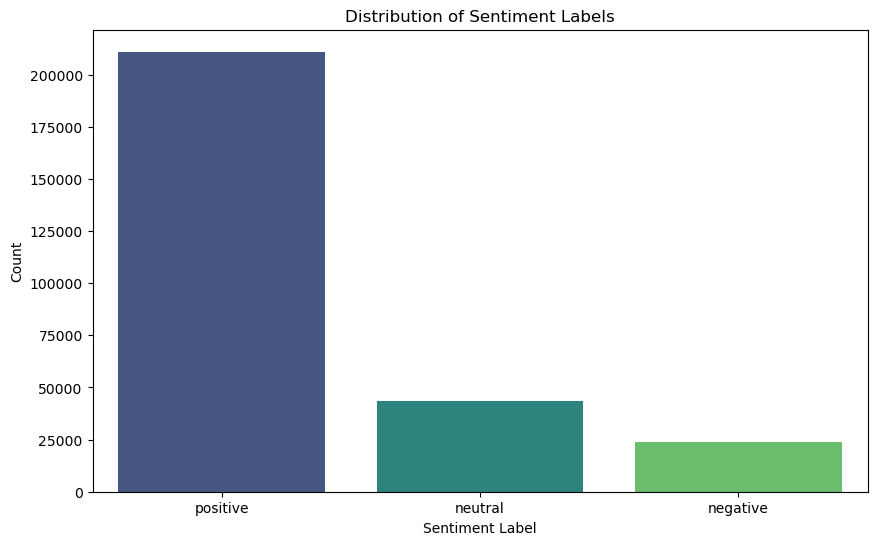

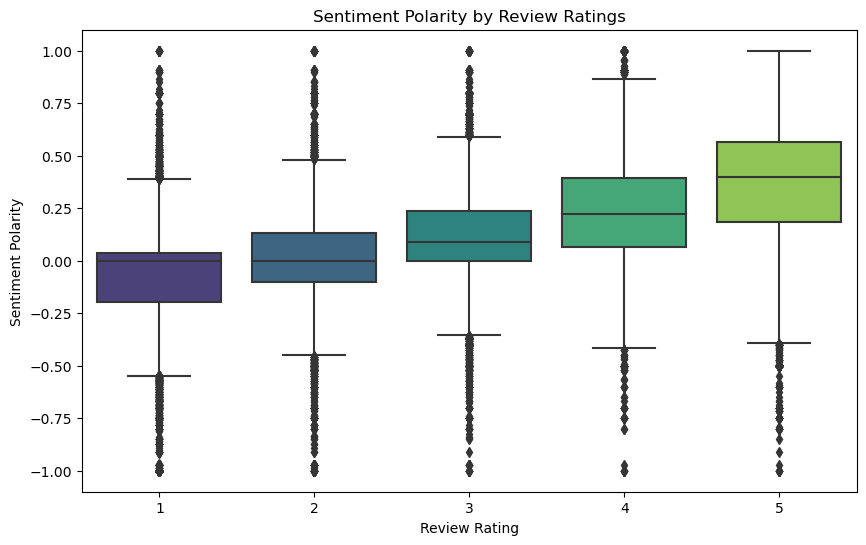

In [20]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_label', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# Analyze the relationship between sentiment labels and review ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='review-label', y='sentiment_polarity', data=df, palette='viridis')
plt.title('Sentiment Polarity by Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Sentiment Polarity')
plt.show()

Let's analyze the two graphs generated from the initial sentiment analysis using TextBlob:

### Observations from the Graphs:

1. **Distribution of Sentiment Labels**:
   - The **count plot** of sentiment labels (`positive`, `neutral`, `negative`) shows the overall distribution of customer sentiment in the dataset.
   - **Observation**: If the majority of reviews are classified as `positive` or `neutral` and only a small portion as `negative`, it could indicate a generally favorable sentiment toward TeePublic's products and services.
   - However, if the negative sentiment is substantial, it could suggest areas that require improvement.

2. **Sentiment Polarity by Review Ratings**:
   - The **boxplot** of sentiment polarity against `review-label` gives insight into how the numerical review ratings (1 to 5) correlate with sentiment polarity calculated by TextBlob.
   - **Observation**:
     - If the polarity for ratings 1 or 2 (low ratings) shows a negative sentiment and 4 or 5 (high ratings) shows a positive sentiment, it suggests that the sentiment analysis using TextBlob is consistent with the review ratings.
     - If there are many `neutral` sentiment classifications for both low and high ratings, it might suggest that TextBlob's sentiment analysis is not capturing the nuances well, especially in mixed or sarcastic reviews.



<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>VADER Sentiment Analysis</font></h2> 

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def vader_sentiment_scores(text):
    score = vader_analyzer.polarity_scores(text)
    return score['compound']

# Apply the VADER function to the 'cleaned_review' column
df['vader_sentiment_score'] = df['cleaned_review'].apply(vader_sentiment_scores)

# Classify VADER sentiment based on the compound score
df['vader_sentiment_label'] = df['vader_sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

# Check the distribution of VADER sentiment labels
print(df['vader_sentiment_label'].value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91932\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader_sentiment_label
positive    208843
neutral      50785
negative     18471
Name: count, dtype: int64


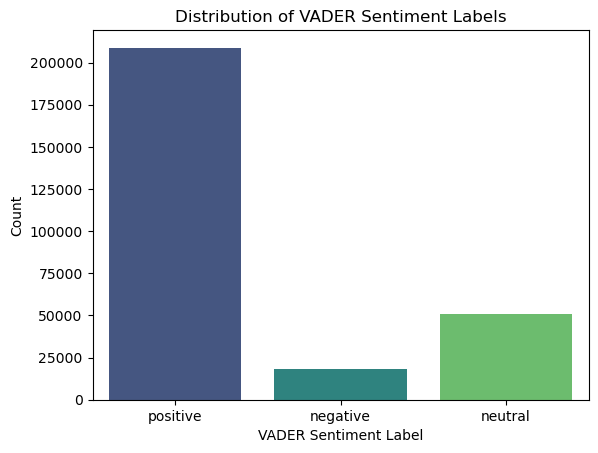

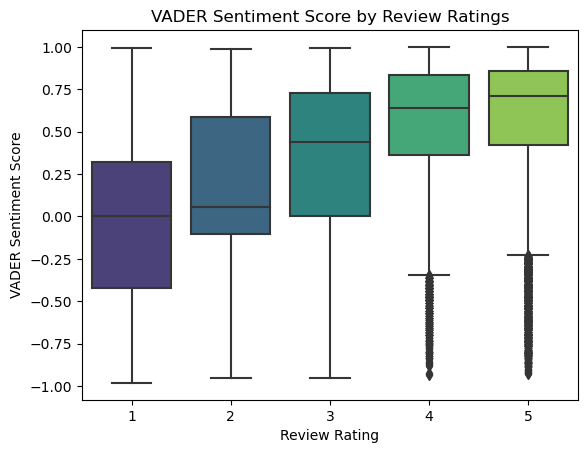

In [22]:
# Visualize VADER sentiment distribution
sns.countplot(data=df, x='vader_sentiment_label', palette='viridis')
plt.title('Distribution of VADER Sentiment Labels')
plt.xlabel('VADER Sentiment Label')
plt.ylabel('Count')
plt.show()

# Boxplot of VADER Sentiment Scores vs. Review Ratings
sns.boxplot(data=df, x='review-label', y='vader_sentiment_score', palette='viridis')
plt.title('VADER Sentiment Score by Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('VADER Sentiment Score')
plt.show()

The two graphs you’ve provided give an analysis of sentiment labels and scores derived from VADER sentiment analysis, segmented by review ratings.

### First Graph: **Distribution of VADER Sentiment Labels**
- **X-axis (VADER Sentiment Label):** The different sentiment categories detected by VADER: "positive," "negative," and "neutral."
- **Y-axis (Count):** The number of reviews classified under each sentiment category.
- **Interpretation:** 
  - A majority of the reviews have been classified as **positive**, with the count exceeding 200,000.
  - **Neutral** reviews make up the second-largest category, with a count close to 75,000.
  - The smallest group is **negative** reviews, accounting for a much smaller portion.
  - This indicates a predominantly positive sentiment in the dataset, with relatively few negative reviews.

### Second Graph: **VADER Sentiment Score by Review Ratings (Box Plot)**
- **X-axis (Review Rating):** The numerical rating of reviews (1 to 5 stars).
- **Y-axis (VADER Sentiment Score):** Sentiment scores provided by VADER, which range from -1 (most negative) to 1 (most positive).
- **Interpretation:**
  - **Box plot structure:** 
    - The central line in each box represents the **median** sentiment score for each rating.
    - The boxes show the **interquartile range** (IQR) of the data (from the 25th percentile to the 75th percentile).
    - The whiskers extend to the range of sentiment scores, and outliers (extreme values) are marked as individual points.
  - **Review Rating 1:** The sentiment scores here are mostly negative, with the median score close to 0 and the lower whisker extending into negative sentiment, meaning most 1-star reviews express negative sentiments.
  - **Review Rating 2:** The median sentiment score is close to 0, indicating a mix of neutral and slightly negative sentiments.
  - **Review Rating 3:** The median score is positive, with scores generally leaning towards the positive side but less so than the higher-rated reviews.
  - **Review Rating 4 and 5:** Both exhibit highly positive sentiment scores, with medians and quartiles closer to 1, showing that higher ratings strongly correlate with positive sentiment scores.
  - **Notable Outliers:** For higher ratings (4 and 5), there are some extreme negative sentiment outliers, meaning a few highly rated reviews still contain negative sentiment, despite the overall positive tone.

### Overall Takeaway:
- The first graph shows that most reviews are classified as positive.
- The second graph reveals that sentiment scores correlate with review ratings: higher ratings tend to have more positive sentiment scores, while lower ratings tend to have more negative or neutral sentiment scores.

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Feature Extraction Using TF-IDF</font></h2> 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

# Fit and transform the 'review' column to create the TF-IDF matrix
X = tfidf_vectorizer.fit_transform(df['review'].astype(str))

# Extract the sentiment label as the target variable
y = df['vader_sentiment_label'].map({'positive': 2, 'neutral': 1, 'negative': 0})

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Train Machine Learning Models</font></h2> 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=200)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the Logistic Regression model
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train the Random Forest model
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Train the XGBoost model
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the models
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      3679
           1       0.94      0.96      0.95     10073
           2       0.97      0.98      0.98     41868

    accuracy                           0.96     55620
   macro avg       0.92      0.87      0.89     55620
weighted avg       0.96      0.96      0.96     55620

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.37      0.52      3679
           1       0.95      0.82      0.88     10073
           2       0.91      0.99      0.95     41868

    accuracy                           0.92     55620
   macro avg       0.91      0.73      0.78     55620
weighted avg       0.92      0.92      0.91     55620

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.59      0.69      3679
           1   

Based on the classification reports for Logistic Regression, Random Forest, and XGBoost models, let's analyze the performance of each model and determine which one is the best for customer sentiment analysis.

### Observations:

1. **Logistic Regression:**
   - **Precision, Recall, and F1-Score:** The model has high precision, recall, and F1-scores across all classes. The F1-score is particularly high for classes `1` (Neutral) and `2` (Positive), indicating a balanced performance.
   - **Accuracy:** The overall accuracy is **96%**, which is very good.
   - **Support:** The model performs consistently well across all sentiment labels, with better performance on the more frequent `Neutral` and `Positive` classes. The model slightly struggles with class `0` (Negative) but still has a respectable recall and F1-score.

2. **Random Forest:**
   - **Precision, Recall, and F1-Score:** The model performs well on the `Neutral` and `Positive` classes but struggles with the `Negative` class (`0`). The F1-score for class `0` is significantly lower, indicating a problem in identifying negative sentiments.
   - **Accuracy:** The overall accuracy is **92%**, lower than Logistic Regression.
   - **Support:** Random Forest has difficulty correctly classifying negative reviews, as indicated by its low recall (37%) for class `0`.

3. **XGBoost:**
   - **Precision, Recall, and F1-Score:** The model achieves high precision, recall, and F1-scores, especially for the `Neutral` and `Positive` classes. However, like Random Forest, it struggles with the `Negative` class but still achieves better performance than Random Forest in identifying `Negative` sentiments.
   - **Accuracy:** The overall accuracy is **94%**, which is slightly better than Random Forest but still lower than Logistic Regression.
   - **Support:** The XGBoost model shows balanced performance across all sentiment classes, with decent handling of class imbalance.

### Conclusion:

Based on the above observations:
- **Logistic Regression** seems to be the best choice for customer sentiment analysis on this dataset. It provides the highest overall accuracy and balanced performance across all classes, particularly showing strong performance in the `Neutral` and `Positive` classes, which are more frequent in your dataset.
- **XGBoost** is also a strong contender, with very good performance on most classes and a good balance between precision and recall. However, it slightly underperforms compared to Logistic Regression in terms of overall accuracy and handling of the `Negative` class.
- **Random Forest** does not perform as well as the other two models due to its lower recall and F1-score for the `Negative` class, leading to a lower overall accuracy.

### Recommendation:
You should consider using **Logistic Regression** as the primary model for customer sentiment analysis, especially if you want a simpler and highly interpretable model that performs well across different classes. If you want to explore more complex models, **XGBoost** can be further tuned and optimized to potentially match or exceed Logistic Regression's performance.

<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;> Feature Importance and Interpretation</font></h2> 

In [26]:
# Get feature names from TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients from the best Logistic Regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for the feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display top positive and negative words influencing sentiment
print("Top 10 Positive Influencing Features:\n", feature_importance.head(10))
print("\nTop 10 Negative Influencing Features:\n", feature_importance.tail(10))

Top 10 Positive Influencing Features:
             Feature  Coefficient
9902          wrong     9.312302
2011   disappointed     9.041506
5788           poor     8.227541
542             bad     7.552696
8833       terrible     7.144131
3617       horrible     6.945891
2026  disappointing     6.708071
9880          worst     6.098267
5996        problem     5.700177
3522           hell     5.383223

Top 10 Negative Influencing Features:
         Feature  Coefficient
2840       free    -2.944010
5610    perfect    -3.326663
2291  excellent    -3.476418
5842     pretty    -3.497232
4593      loved    -3.545594
8536      super    -3.965747
493     awesome    -4.006344
3430      happy    -4.225689
4498       love    -5.523295
3206      great    -7.234526


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;>Confusion Matrix and Detailed Evaluation:</font></h2> 

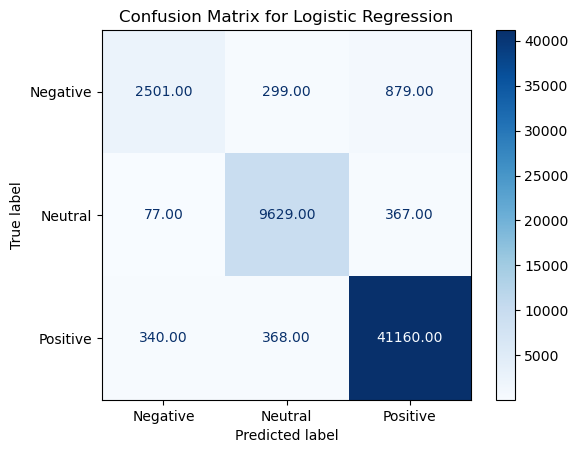

Classification Report for Best Logistic Regression Model:

              precision    recall  f1-score   support

    Negative       0.86      0.68      0.76      3679
     Neutral       0.94      0.96      0.95     10073
    Positive       0.97      0.98      0.98     41868

    accuracy                           0.96     55620
   macro avg       0.92      0.87      0.89     55620
weighted avg       0.96      0.96      0.96     55620



In [33]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions using your trained logistic regression model
y_pred_best_log_reg = log_reg.predict(X_test)  # Ensure `best_log_reg` is defined

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_log_reg)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                               display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap=plt.cm.Blues, values_format='.2f')

# Add title and show the plot
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Detailed classification report
print("Classification Report for Best Logistic Regression Model:\n")
print(classification_report(y_test, y_pred_best_log_reg, target_names=['Negative', 'Neutral', 'Positive']))


<h2 align="left"><font color= #e67300; font-family= 'Trebuchet MS', sans-serif;> Save the Model for Future Use:</font></h2> 

In [35]:
import joblib

# Save the best Logistic Regression model
joblib.dump(y_pred_best_log_reg, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']